|実世界のcancerデータセットを用いてモデルの複雑さと汎化性能の関係を確認する|
|:-|

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [ ]:
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

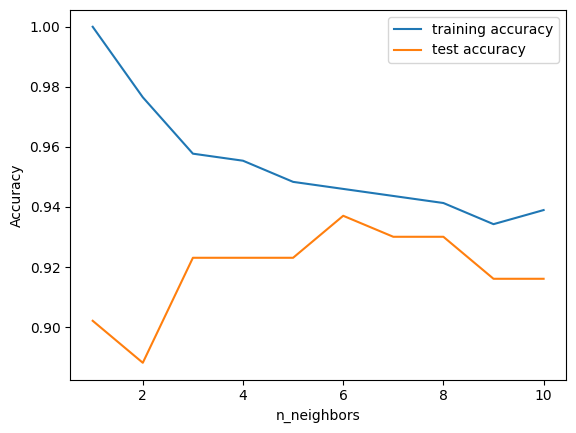

In [ ]:
# stratify=cancer.targetとすることで，訓練セットとテストセットに含まれるクラス比率が元のデータセットと同じになるようにする
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 分割前のデータを作る
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

training_accuracy = []
test_accuracy = []
# n_neighborsを1から10まで試す
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # モデルを構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

k-最近傍法には，回帰を行う変種がある．ここでも１最近傍点を用いる者から見ていく．今回はwaveデータセットを用いる．３つのテストデータポイントを緑色の星印としてx軸上に書いた．１最近傍点を用いる予測では，最近傍点の値をそのまま使う．青い星印が予測点である，

In [ ]:
# import mglearn
# mglearn.plots.plot_knn_regression(n_neighbors=1)

クラス分類の場合と同様に，より多くの最近傍点を用いることもできる．複数の最近傍点を用いる場合には，最近傍点の平均値を用いる．

In [ ]:
# mglearn.plots.plot_knn_regression(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ３つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる．
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test))) # テストセットに対する精度

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


scoreメソッドを用いてモデルを評価することもできる．このメソッドに対して回帰予測器は，$R^2$スコアを返す．$R^2$スコアは決定係数と呼ばれ，回帰モデルの予測の正確さを測る指標で，0から1までの値を取る．1は完全な予測に対応し，0は訓練セットのレスポンス値の平均を返すだけのものに対応する．

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


これは比較的良いモデルであることを意味する．

**一次元のデータセットに対して，すべての値に対する予測値がどのようになるかを見てみる．これには，たくさんのデータポイントを持つデータセットをつくればよい．**

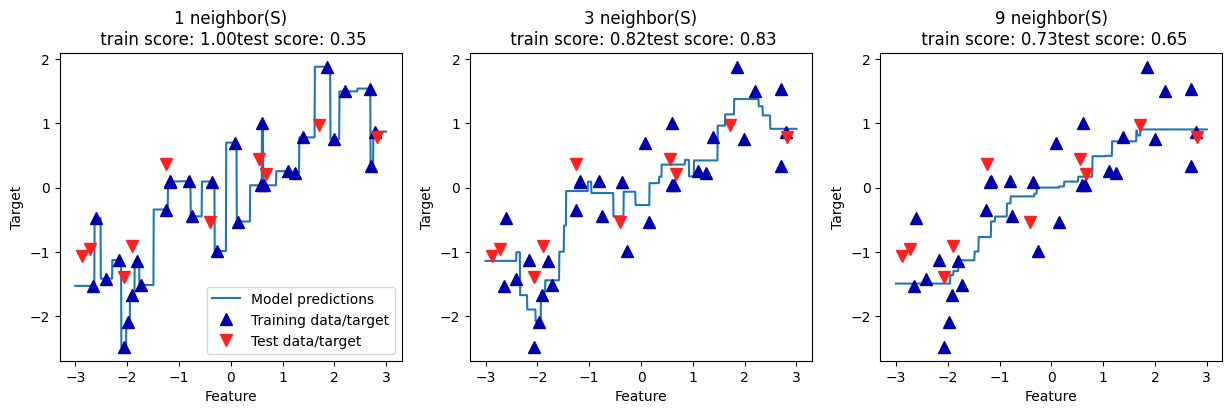

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3から3までの間に1000点のデータポイントを作る．
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(S)\n train score: {:.2f}test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc ="best")
        

このグラフからわかるように，１最近傍点による回帰では訓練セットの個々の点が明らかに予測に影響を与えており，予測はすべて訓練データのポイントを通っている．このため予測は非常に不安定になっている．考慮する最近傍点を増やしていくと，予測はスムーズになるが，訓練データに対する適合度は下がる．